# Freshwater fluxes in Sognefjord
 A practical exercise in python<br>
 Course :    GEOF105<br>
 Created by: Kjersti Daae<br>

In this exercise, we will explore the freshwater fluxes in Sognefjord. We want to study the magnitude of the fluxes and the seasonal variations, and calculate tluxes and volume transports using real data. Sognefjorden is approximately 205 km long, with several side fjords. The width of the fjord varies between 2-5 km. The maximum depth is 1308 m. Close to the coast, there is a 200m deep sill.

## 1 Freshwater fluxes (do not require python code)

a) What sources contribute to the freshwater fluxes in Sognefjord? <br>

    answer: Precipitation, river discharge, and evaporation<br>

b) How large is the surface area of Sognefjord? Use a digital map service to estimate the Sognefjrod area. Both Google Earth and Norkeskart.no have digitale tools for area esimates <br>

    answer: Roughly $1125000000\,m^2 = 1125\,km^2$ <br>

c) Assume that it rains 1500 $mm\,yr^{-1}$ in Sognefjord. How large is the associated precipitation freshwater flux? Give the answer in $m^3\,s^{-1}$<br>

    answer: The annual mean precipitation freshwater flux in Sognefjord is 53.51 m³/s (calculations below)<br>

d) Assume that the total freshwater flux from rivers is 250 m³/s. How much would the sea level in sognefjord increase if all the freshwater stayed in the fjord (i.e. no contact between the fjord and the coast outside) <br>

    answer: The sea level would reise 7.01 m/year from river discharge (calculations below)<br>

e) Sketch and explain how the freshwater fluxes contribute to circulation in the fjord <br>

    answer: Estuarine circulation...


In [1]:
#c)
Fjord_area=1125000000 #m^2
P=1500                #mm/year
FP=(P*Fjord_area)/(1000*(60*60*24*365))
print(f' 1c) The annual mean precipitation freshwater flux in Sognefjord is {FP:.2f} m\u00b3/s ')

#d)
FR=250                # m3/s
R_sealevel=FR/Fjord_area*(60*60*24*365)
print(f' 1d) The sea level would rise {R_sealevel:.2f} m/year from river discharge')

 1c) The annual mean precipitation freshwater flux in Sognefjord is 53.51 m³/s 
 1d) The sea level would rise 7.01 m/year from river discharge


## 2 Freshwater fluxes in Sognefjord (seasonal)

In [2]:
#Import necessary python libraries
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np

#### a) Read precipitation data from three me.no stations

Read monthly precipitation data [mm/month] from the file precip_sogn.csv into a temporaty pandas dataframe called P_tmp.<br> 
The data file contains precipitation data from three stations, located at Ytre Solund, Vangsnes, and Skjolden.<br>
create a pandas dataframe P for precipitation, where each station is one column, and the mean precipitation is assigned as the last column.

In [3]:
'''
Do not make changes in this cell 
'''
folder="./Data/"        # path to the data folder. Dot (.) at the start means we start the path from the folder where this notebook is
fname="precip_sogn.csv" #file name
P_tmp = pd.read_csv(folder+fname, header=0,sep=';',decimal=',')           # read the data into a preliminary dataframe
P_tmp.index =  pd.to_datetime(P_tmp['Tid(norsk normaltid)'],format='%m.%Y')   # set time index as the main index of the dataframe
P_tmp.index.name = 'Time'                                                 # Rename the time index

#Extract one temporary dataframe from each station
YtreSolund =P_tmp.loc[P_tmp['Navn'] == 'Ytre Solund']
Vangsnes =P_tmp.loc[P_tmp['Navn'] == 'Vangsnes']
Skjolden =P_tmp.loc[P_tmp['Navn'] == 'Skjolden']

#Combine all data into a dataframe with one column per station
P=pd.DataFrame(index=P_tmp.index[0:12])
P['YtreSolund'] = YtreSolund['Nedbør (mnd)']
P['Vangsnes'] = Vangsnes['Nedbør (mnd)']
P['Skjolden'] = Skjolden['Nedbør (mnd)']

# Calculate the mean of the three stations and add as a column to the dataframe
P['Mean'] = P.mean(axis=1)

#uncomment/comment the next line to see/not see the pandas dataframe
P

,YtreSolund,Vangsnes,Skjolden,Mean
Time,,,,
2020-01-01,277.6,273.6,268.4,273.200000
2020-02-01,223.2,181.3,179.5,194.666667
2020-03-01,164.2,159.1,93.9,139.066667
2020-04-01,100.2,92.0,68.0,86.733333
2020-05-01,96.4,36.2,34.5,55.700000
2020-06-01,42.0,11.7,17.2,23.633333
2020-07-01,159.5,79.1,59.5,99.366667
2020-08-01,120.8,80.1,64.7,88.533333
2020-09-01,222.8,173.8,116.1,170.900000


#### Read riverdischarge data from all available rivers in Sognefjord
1) First read daily river discharge data [m3/s] from files in the folder ./Data/Rivers into a pandas dataframe called River_day.<br>
2) Create another pandas dataframe called FR with monthly averaged river discharge.<br>
3) Calculate the sum of the rivers in a separate column of the dataframe

In [4]:
'''
Do not make changes in this cell 
'''
#1)
# Instead of writing up all filenames and read one by one, we can use 'glob' to list all the files in the directory. 
# Then we can make a for-loop to read each file
files=glob.glob("./Data/Rivers/*.csv")

for i,fname in enumerate(files):
    #The filename contain the staion name. We want to separate out the station name by using the split function twice (easy option)
    namesplit1=fname.split('-')
    namesplit2=namesplit1[-1].split('.')
    station_name=namesplit2[0]

    R = pd.read_csv(fname, header=1,sep=';',decimal=',')
    R.index =  pd.to_datetime(R['Tidspunkt'],format='%Y-%m-%d %H:%M:%SZ')
    R.index.name = 'Time'
    
    if i<1:
        River_day=pd.DataFrame(index=R.index)
        River_day[station_name] = R['Vannføring (m³/s)']
    else:
        River_day[station_name] = R['Vannføring (m³/s)']
    
#2) 
# We can now make monthly means by resampling the dataframe. 
# To choose monthly means, we indicate 'M' in the resample function
FR=River_day.resample('M').mean()

#3)
#Sum the river discharges into a separate column
FR['Total'] = FR.sum(axis=1)

#uncomment/comment the next line to see/not see the pandas dataframe
FR

,Skjerping,Fornabo,Sogndalsvann,Nessedalselv,Boyumselv,Feigumfoss,Ulleboe2020,Stuvane,Flaam,Krokenelv,Mel,Myklemyr,Fortun,utla,Total
Time,,,,,,,,,,,,,,,
2020-01-31,13.956203,1.114217,7.420771,3.078782,3.333318,0.837603,2.212246,23.669888,9.044820,0.907757,2.539401,8.371418,19.841525,4.869205,101.197153
2020-02-29,6.305838,0.521066,3.443111,1.229879,1.953048,0.522218,0.705035,19.423552,5.360475,0.395747,1.269433,4.592457,17.760991,1.807130,65.289984
2020-03-31,4.890725,0.360982,2.411914,0.981260,1.483534,0.382026,0.531347,16.617096,5.123445,0.304431,0.903113,4.123807,16.383295,1.336107,55.833083
2020-04-30,9.829711,0.679068,4.874200,2.531058,2.950427,0.495055,1.072012,18.759181,6.768999,0.750321,2.201599,8.778055,9.710590,3.623998,73.024274
2020-05-31,23.418706,2.059880,8.951595,3.848804,3.474903,1.492036,1.368765,26.293772,10.121398,2.424074,2.985774,19.916499,16.117253,12.387144,134.860602
2020-06-30,75.061043,12.712217,37.934914,10.804521,14.797098,12.415902,1.398527,158.770164,85.614852,14.660003,8.346854,90.477631,59.879231,105.278968,688.151925
2020-07-31,28.280952,3.167102,15.882488,2.810430,10.543209,6.031043,0.522881,50.231873,49.563772,4.352150,5.367062,59.602653,NaN,35.656767,272.012382
2020-08-31,18.771123,1.641221,14.654134,1.513767,15.529086,3.887414,0.513598,48.930656,40.779909,2.113863,5.551028,81.848493,NaN,30.506553,266.240845
2020-09-30,27.292585,2.707156,14.826066,4.388346,10.810913,4.266384,1.513822,33.139223,36.152022,2.981147,6.148888,46.482737,NaN,27.128391,217.837680


In [5]:
#assign constants for fjord dimensions
Hmax=1300                           #unit m - max fjord depth
fjord_width=4500                    #unit m - average width
fjord_length=250000                 #unit m - total length (main fjord + side fjords)
fjord_area=fjord_width*fjord_length #unit m^2 (rough estimate - you can make a better one in google earth if you like ;)
Hsill=200                           #depth of sill

2b): How much does it rain in total over one year at each station, and on average?
(Hint: dataframe.sum)

    answer:
    YtreSolund    2038.5
    Vangsnes      1363.9
    Skjolden      1218.6
    Mean          1540.3

In [6]:
#2b)
P.sum(axis=0)

YtreSolund    2038.500000
Vangsnes      1363.900000
Skjolden      1218.600000
Mean          1540.333333
dtype: float64

2c) Make a dataframe, FP, with freshwater fluxes for precipitation. You can assume 30 days in each month to make it simpler to calculate. Remember to convert from $mm\,month^{-1}$ to $m^3\,s^{-1}$.<br>
Hint1: dataframe.mean<br>
Hint2: consider the area of the fjord, and make a new dataframe named FP_tmp for the precipitation freshwater flux. Then use the same monthly mean function as for rivers to make sure the time index is the same as for the river data. This is a simple fix that does not change the data, which are monthly already

In [7]:
#2c) Make a copy of the precipitation dataframe and convert alle the data into fluxes.
FP_tmp=P/(1000*30*24*60*60)*fjord_area
#FP_tmp.mean(axis=0)
FP=FP_tmp.resample('M').mean()
print(FP)

            YtreSolund    Vangsnes    Skjolden        Mean
Time                                                      
2020-01-31  120.486111  118.750000  116.493056  118.576389
2020-02-29   96.875000   78.689236   77.907986   84.490741
2020-03-31   71.267361   69.053819   40.755208   60.358796
2020-04-30   43.489583   39.930556   29.513889   37.644676
2020-05-31   41.840278   15.711806   14.973958   24.175347
2020-06-30   18.229167    5.078125    7.465278   10.257523
2020-07-31   69.227431   34.331597   25.824653   43.127894
2020-08-31   52.430556   34.765625   28.081597   38.425926
2020-09-30   96.701389   75.434028   50.390625   74.175347
2020-10-31   64.800347   24.522569   21.050347   36.791088
2020-11-30  116.883681   83.463542  100.868056  100.405093
2020-12-31   92.534722   12.239583   15.581597   40.118634


2d) Estimate the annual mean freshwater flux from river discharge and precipitation and compare these

    answer: The annual mean freshwater flux from river discharge is 181.19 m³/s and from precipitation is 55.71 m³/s

In [8]:
# 2d)
mean_FR=FR["Total"].mean()
mean_FP=FP["Mean"].mean()

print(f' 2d) The annual mean freshwater flux from river discharge is {mean_FR:.2f} m\u00b3/s and from precipitation is {mean_FP:.2f} m\u00b3/s')

 2d) The annual mean freshwater flux from river discharge is 181.19 m³/s and from precipitation is 55.71 m³/s


2e) Repeat exercise 1d and estimate how much the sea level would increase as a result of these freshwater fluxes

    answer: The sea level in Sognefjord would rise 5.08 m/year from river discharge and 1.56 m/year from precipitation. In total, the sealevel would rise 6.64 m/year

In [9]:
FR_sealevel=mean_FR*(60*60*24*365)/fjord_area
FP_sealevel=mean_FP*(60*60*24*365)/fjord_area

print(f' 2e) The sea level in Sognefjord would rise {FR_sealevel:.2f} m/year from river discharge and {FP_sealevel:.2f} m/year from precipitation. In total, the sealevel would rise {FP_sealevel+FR_sealevel:.2f} m/year')

 2e) The sea level in Sognefjord would rise 5.08 m/year from river discharge and 1.56 m/year from precipitation. In total, the sealevel would rise 6.64 m/year


2f) Plot the monthly freshwater fluxes from precipitation and rivers into one figure. You can use the example code, or you can create the plot in your preferred style. How does the fluxes cary through the year?

    answer:  The freshwater fluxes vary differently throughout the year. The river flux is largest during summer, and smallest during winter, while the precipitation flux is largest during winter and smallest during summer. The freshwater flux from rivers is greater than for precipitation throughout the year. 
    
2g) Can you speculate why the seasonal changes are like this?

    answer: Overall, the precipitation is higher during winter, when the air temperature is lower. In winter, the precipitation in the cathment areas come as snow, and does not contribute much to the river discharge. This causes the river discharge to be lowest during winter. In summer, the precipitation is likely to be rain in entire catchment areas, and contribute to the elevated river fluxes in summer. The river flux has a large peak in June. This is most likely the month where the meltwater contribution from snow is largest. 
    
2h) When are the freshwater fluxes from rivers and precipitation roughly similar?

    answer: From decemeber to March
    

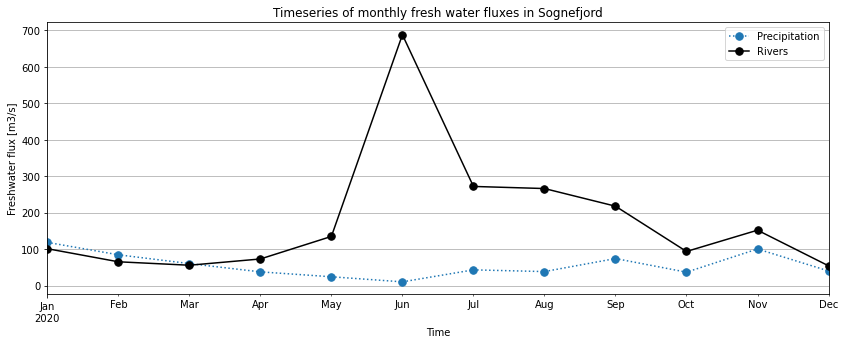

In [10]:
'''
Do not make changes in this cell 
'''
#2 f,g,h) Example of plotting
fig, axs = plt.subplots( figsize=(14,5) )
FP.plot(y='Mean',style='.:',markersize=15,label='Precipitation',ax=axs)
FR.plot(y='Total',style='.-k',markersize=15,label='Rivers',ax=axs)

axs.set_title('Timeseries of monthly fresh water fluxes in Sognefjord')
axs.set_ylabel('Freshwater flux [m3/s]')
axs.grid()

2i) What is the total freshwater flux in Sognefjord in January and in July?

    answer: january: 320.97m³/s, july: 587.15 m³/s (code below)

In [11]:
#2i)
F_total=FP["Mean"]+FR["Total"]
F_jan=F_total[0]
F_jul=F_total[6]

print(F_total)

print(f' 2i) The total freshwater flux in January is {F_jan:.2f} m\u00b3/s. In July, the total freshwater flux is {F_jul:.2f} m\u00b3/s')


Time
2020-01-31    219.773542
2020-02-29    149.780724
2020-03-31    116.191879
2020-04-30    110.668950
2020-05-31    159.035949
2020-06-30    698.409448
2020-07-31    315.140275
2020-08-31    304.666771
2020-09-30    292.013027
2020-10-31    130.405633
2020-11-30    252.400763
2020-12-31     94.353652
Freq: M, dtype: float64
 2i) The total freshwater flux in January is 219.77 m³/s. In July, the total freshwater flux is 315.14 m³/s


§2j) We did not consider the frehswater flux from evaporation? What assumptions would you need to make in order to estimate this flux? 

    answer: We have not made estimates of evaporation fluxes. The evaporation freshwater flux can be calculated fro the latent heat flux, which depends on sea surface temperature, air temperature/density, specific humidity, and wind speed. All these parameters vary with season. We could, as a 'back of the envelope' estimate make an example for the average yearly mean evaporation freshwater flux.

2k) Challenge: Try to make relevant assumptions and estimate a yearly average evaporation freshwater flux. How much would the sea level increase/decrease over a year, based on this flux? <br>
Hint1: Calculate the rate of vaporation(E) from equations 2.11 and 3.4 in Karnauskas. You can set C_lh=0.00156 (from C_lh=1.2*C_sh and C_sh selected from Table 5.2 p133 in Talley.)
Hint2: You need to estimate the specific humidities or use reasonable values for these. You can use qs=0.007 kg/kg and qa=0.009 kg/kg

    answer:  Lets assume the air temperature is 9 degC and the sea surface temperature is 10 degC, an air density of 1.2 kg/m3, and a wind speed of 2 m/s. Let's also assume qs=0.007 kg/kg and qa=0.009 kg/kg (alternatively calculate from Ta, Ts, msl, Td). This gives us a freshwater flux of -8.20 m3/s. The minus sign means that the evaporation is a sink of freshwater, and that the sea level is decreasing (which makes sense!). The freshwater flux corresponds to a lowering of the sea level by 0.23 m over one year.    
    

In [12]:
# Equation 2.11 and 3.4 combined yields and equation for E
# E=rho_air*C_lh*W*(qs-qa)

#This code is the based on what was used in class for heat fluxes
rho_air = 1.2 #(kg/m3)
rho_water = 1027 #(kg/m3)
#C_sh = 1.3e-3 #W/(m2 K) # choose a relevant number from Table 5.2 p133 (Note that these numbers should be multiplied by 10^-3 - error in the book!)
#C_lh = C_sh * 1.2 #commonly used simplification
C_lh=0.00156
W = 2 #wind speed (m/s)

#Use simple estimates for qs and qe below, or also guess a mean dew point temperature and mean sea level pressure to calculate these
qs = 0.007 #saturated specific humidity (kg/kg) - we assume the humidity is saturated at sea level and use sea surface temperature
qa = 0.009 #specific humidity (kg/kg)

#calculate specific humidity - if you prefer
'''
Ts = 10 #sea surface temperature - same as air temperature just above the surface (should be in celsius in eq for l!)
Ta = 9 # air temperature
Td = 5 # dew point temperature
msl= 1013
e = 6.112*np.exp((17.67*Td)/(Td + 243.5)) # calculate water vapor pressure
es = 6.112*np.exp((17.67*Ta)/(Ts + 243.5))# calculate saturated water vapor pressure
q = (0.622 * e)/(msl - (0.378 * e)) # calculate specific humidity
qs = (0.622 * es)/(msl - (0.378 * es)) # calculate saturated specific humidity
'''

#calculate the rate of evaporation (E)
E = rho_air * C_lh * W * (qs - qa) # [kg s^-1 m^-2]

# The freshwater flux from evaporation can be estimated from Fe*fjord_area/rho_water. 
FE=E*fjord_area/rho_water
FE_sealevel=FE*(60*60*24*365)/fjord_area
print(f' 2j) The roughly estimate for an evaporation freshwater flux is {FE:.2f} m\u00b3/s. This corresponds to a sea level rise of {FE_sealevel:.2f} m. ') 

 2j) The roughly estimate for an evaporation freshwater flux is -8.20 m³/s. This corresponds to a sea level rise of -0.23 m. 


## 3 Volume transport in Sognefjord
Knudsens relations is given by:<br>
$F = V_i(\frac{S_i}{S_o}-1)$<br>
$F = V_o(1-\frac{S_o}{S_i})$<br>

3a) Explain what the parameters in the equation mean, and what the equation can be used for.

    answer: F is the total freshwater flux from evaporation, precipitation, and river discharge. V_o is the volume transport (velocity times transect area) out of the fjord. This would be equivalent to the upper layer in a fjord. S_o is the salinity of the upper layer. Likewise, V_i is the volume transport into the fjord in the lower layer, and S_i is the salinity of this lower layer. We can use the equation to estimate colume transport, given that we know the freshwater flux and the layer properties (depth and salinity).

3b) Look at the salt profiles from Sognesjøen in July. Make a rough estimate of depth and salinity of each layer (Hint:assume the lower layer ends at the sill depth of 200 m)

    answer: In July, the upper layer is roughly 20 m deep, with a silinity of S_o~33.5 g/kg. The lower layer is then 200-20=180m deep, with a salinity of Si~35 g/kg
    
3c) Estimate the transect area of each layer

    answer:We assume the fjord is 5 km wide at the sill area in Sognesjøen. This gives and area of A_o~20 m * 5 km = 100 000 m2 and A_i= 180m * 5 km = 900 000 m2
    
3d) Estimate the current speed in each layer in July 2020

    answer: The upper layer speed is roughly 0.137 m/s, and the lower layer speed is roughly 0.015 m/s. This matches the general rule of thumb that the upper layer speed is one order of magnitude larger than the lower layer speed
   
3e) Estimate the current speed in each layer in January 2020

    answer: We get an upper layer speed of 0.025 m/s and a lower layer speed of 0.008 m/s. 
    
3f) Comment on the assumptions we make when using the Knudsen relations to calculate current speed. Are theymore/less valid in July than in January?

    answer: We assume a 2-layer composition of the water column. The two-layer assumption is less accurate for January than for July.

In [13]:
#3b)
Ho_july=20  #[m] depth of upper layer
Hi_july=Hsill-Ho_july #[m] depth of lower layer
So_july=33.5 #[g/kg] upper layer salinity
Si_july=35.0 #[g/kg] lower layer salinity

#3c)
sill_width=5000 #[m] fjord width at sill area
Ao_july=Ho_july*sill_width #Upper layer transect area
Ai_july=Hi_july*sill_width #lower layer transect area
print(f' 3c) The upper layer transect area is {Ao_july:.1f} m\u00b2. The lower layer transect area is {Ai_july:.1f} m\u00b2')

#3d)
Vi_july = F_jul/((Si_july/So_july)-1) # volume transport
Vo_july = F_jul/(1-(So_july/Si_july)) # volume transport

speed_i_july=Vi_july/Ai_july #current speed in the lower layer
speed_o_july=Vo_july/Ao_july #current speed in the Upper layer

print(f' 3d) The upper layer speed is {speed_o_july:.3f} m/s. The lower layer speed is {speed_i_july:.3f} m/s')


 3c) The upper layer transect area is 100000.0 m². The lower layer transect area is 900000.0 m²
 3d) The upper layer speed is 0.074 m/s. The lower layer speed is 0.008 m/s


In [14]:
#3e)
Ho_jan=50  #[m] depth of upper layer
Hi_jan=Hsill-Ho_jan #[m] depth of lower layer
So_jan=32.75 #[g/kg] upper layer salinity
Si_jan=34.5 #[g/kg] lower layer salinity

Ao_jan=Ho_jan*sill_width #Upper layer transect area
Ai_jan=Hi_jan*sill_width #lower layer transect area

Vi_jan = F_jan/((Si_jan/So_jan)-1) # volume transport
Vo_jan= F_jan/(1-(So_jan/Si_jan)) # volume transport

speed_i_jan=Vi_jan/Ai_jan #current speed in the lower layer
speed_o_jan=Vo_jan/Ao_jan #current speed in the Upper layer

print(f' 3e) The upper layer speed is {speed_o_jan:.3f} m/s. The lower layer speed is {speed_i_jan:.3f} m/s')


 3e) The upper layer speed is 0.017 m/s. The lower layer speed is 0.005 m/s
